In [18]:
# https://www.kaggle.com/nathanlauga/nba-games

# qual foi a média de pontos, arremeços, rebotes e assistências nas temporadas 2017, 2018, 2019 de cada jogador?


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from str_to_second import str_to_second

In [2]:
df_gd = pd.read_csv('datasets/games_details.csv')
df_gd.head(5)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,3.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,17.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,4.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,NaN,27:35,1.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,NaN,22:17,2.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [3]:
df_g = pd.read_csv('datasets/games.csv')
df_g.head(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,38.0,41.0,1610612761,118.0,0.461,0.897,0.263,24.0,36.0,1
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,18.0,51.0,1610612765,100.0,0.413,0.667,0.429,23.0,42.0,1


In [5]:
df_gd.shape

(576782, 28)

In [86]:
df_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576782 entries, 0 to 576781
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            576782 non-null  int64  
 1   TEAM_ID            576782 non-null  int64  
 2   TEAM_ABBREVIATION  576782 non-null  object 
 3   TEAM_CITY          576782 non-null  object 
 4   PLAYER_ID          576782 non-null  int64  
 5   PLAYER_NAME        576782 non-null  object 
 6   START_POSITION     221374 non-null  object 
 7   COMMENT            92260 non-null   object 
 8   MIN                484521 non-null  object 
 9   FGM                484521 non-null  float64
 10  FGA                484521 non-null  float64
 11  FG_PCT             484521 non-null  float64
 12  FG3M               484521 non-null  float64
 13  FG3A               484521 non-null  float64
 14  FG3_PCT            484521 non-null  float64
 15  FTM                484521 non-null  float64
 16  FT

In [14]:
df_gd.isna().sum() / df_gd.shape[0]

GAME_ID              0.000000
TEAM_ID              0.000000
TEAM_ABBREVIATION    0.000000
TEAM_CITY            0.000000
PLAYER_ID            0.000000
PLAYER_NAME          0.000000
START_POSITION       0.616191
COMMENT              0.840044
MIN                  0.159958
FGM                  0.159958
FGA                  0.159958
FG_PCT               0.159958
FG3M                 0.159958
FG3A                 0.159958
FG3_PCT              0.159958
FTM                  0.159958
FTA                  0.159958
FT_PCT               0.159958
OREB                 0.159958
DREB                 0.159958
REB                  0.159958
AST                  0.159958
STL                  0.159958
BLK                  0.159958
TO                   0.159958
PF                   0.159958
PTS                  0.159958
PLUS_MINUS           0.200981
MIN_SECONDS          0.000236
SEASON               0.000000
dtype: float64

In [4]:
# A lot of data is missing.
# How to fill with best way?
# I intent to put a mean with basis in time by season. Why? Bom, é normal jogadores sofrerem lesões e quando os
# mesmos voltam a jogar acabam tendo menos tempo de quadra durante a temporada. Outra situação que ocorre é
# com jogadores novatos. Muitos entram já sendo titulares por serem destaques, entretando, outros vem para 
# serem reservas de veteranos.

# First I need to convert to time
# df_gd['MINUTES'] = pd.to_datetime(df_gd['MIN'], format="%M:%S")
# Wait I not got to convert '60:06' minutes. A normal game has 48 minutes, but, sometimes one game can has even four overtimes.
# I have no this information about this. Anyway I will need to convert In a format that I will compare
df_gd['MIN_SECONDS'] = df_gd['MIN'].apply(str_to_second)

In [5]:
# adiciona a coluna season
df_gd = pd.merge(df_gd, df_g[['GAME_ID','SEASON']], on='GAME_ID', how='left')

In [6]:
df_gd.head(10)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,MIN_SECONDS,SEASON
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,3.0,...,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0,1628.0,2019
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,17.0,...,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0,2095.0,2019
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,4.0,...,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0,1585.0,2019
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,NaN,27:35,1.0,...,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0,1655.0,2019
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,NaN,22:17,2.0,...,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0,1337.0,2019
5,21900895,1610612749,MIL,Milwaukee,1626192,Pat Connaughton,NaN,NaN,24:52,2.0,...,5.0,1.0,0.0,0.0,1.0,2.0,6.0,0.0,1492.0,2019
6,21900895,1610612749,MIL,Milwaukee,201577,Robin Lopez,NaN,NaN,13:18,1.0,...,3.0,0.0,0.0,1.0,2.0,1.0,2.0,-12.0,798.0,2019
7,21900895,1610612749,MIL,Milwaukee,1628425,Sterling Brown,NaN,NaN,18:10,1.0,...,3.0,0.0,0.0,0.0,1.0,0.0,3.0,-8.0,1090.0,2019
8,21900895,1610612749,MIL,Milwaukee,101107,Marvin Williams,NaN,NaN,19:37,0.0,...,2.0,2.0,1.0,1.0,1.0,1.0,0.0,-11.0,1177.0,2019
9,21900895,1610612749,MIL,Milwaukee,201588,George Hill,NaN,NaN,25:43,4.0,...,5.0,2.0,2.0,0.0,3.0,1.0,11.0,2.0,1543.0,2019


In [7]:
# Existem valores nulos na coluna SEASON?
df_gd['SEASON'].isna().sum()

0

In [8]:
# Existem valores negativos na coluna MIN_SECONDS?
df_gd[df_gd['MIN_SECONDS'] < 0]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,MIN_SECONDS,SEASON
48097,10800045,1610612745,HOU,Houston,201171,Carl Landry,NaN,NaN,-9,4.0,...,7.0,0.0,0.0,0.0,2.0,3.0,10.0,NaN,-540.0,2008
48098,10800045,1610612745,HOU,Houston,101236,Chuck Hayes,NaN,NaN,-5,2.0,...,5.0,0.0,1.0,1.0,0.0,0.0,4.0,NaN,-300.0,2008
48102,10800045,1610612745,HOU,Houston,1897,Metta World Peace,NaN,NaN,-7,3.0,...,0.0,1.0,0.0,0.0,0.0,2.0,8.0,NaN,-420.0,2008
48104,10800045,1610612745,HOU,Houston,101144,Von Wafer,NaN,NaN,-3,2.0,...,2.0,0.0,0.0,0.0,2.0,2.0,6.0,NaN,-180.0,2008
48106,10800045,1610612760,OKC,Oklahoma City,101243,Chris Alexander,NaN,NaN,-8,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,-480.0,2008
48108,10800045,1610612760,OKC,Oklahoma City,2863,Damien Wilkins,NaN,NaN,-2,4.0,...,3.0,0.0,0.0,0.0,0.0,3.0,9.0,NaN,-120.0,2008
48109,10800045,1610612760,OKC,Oklahoma City,201182,Derrick Byars,NaN,NaN,-5,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,-300.0,2008
48112,10800045,1610612760,OKC,Oklahoma City,101130,Johan Petro,NaN,NaN,-4,5.0,...,7.0,1.0,0.0,1.0,1.0,5.0,12.0,NaN,-240.0,2008
48113,10800045,1610612760,OKC,Oklahoma City,201142,Kevin Durant,NaN,NaN,-3,8.0,...,5.0,4.0,4.0,3.0,2.0,2.0,26.0,NaN,-180.0,2008
48286,10800035,1610612756,PHX,Phoenix,201169,Alando Tucker,NaN,NaN,-2,2.0,...,4.0,0.0,1.0,1.0,1.0,1.0,5.0,NaN,-120.0,2008


In [14]:
# Como eram poucos jogos, pensei em pesquisar para validar alguns dados, porém não encontrei informações.
# Também há valores inconsistentes. Supondo que os valores do tempo estivessem positivos, 
# Kevin durant teria feito 26 pontos em 3 minutos
# Por se tratar de poucos registros, vou zerá-los

df_gd.loc[df_gd['MIN_SECONDS'] < 0, 'PTS'] = 0
df_gd.loc[df_gd['MIN_SECONDS'] < 0, 'REB'] = 0
df_gd.loc[df_gd['MIN_SECONDS'] < 0, 'AST'] = 0
df_gd.loc[df_gd['MIN_SECONDS'] < 0, 'MIN_SECONDS'] = 0

In [8]:
# No inicio da análise vimos que tinha muitos valores faltantes, inclusive de tempo.
# Será que existem jogadores com minutos jogados, cujo os pontos, rebotes e assistências não estão nulos?

print(df_gd[(df_gd['PTS'].isna()) & (df_gd['MIN_SECONDS'] > 0)].empty);
print(df_gd[(df_gd['REB'].isna()) & (df_gd['MIN_SECONDS'] > 0)].empty);
print(df_gd[(df_gd['AST'].isna()) & (df_gd['MIN_SECONDS'] > 0)].empty);

True
True
True


In [15]:
# Sendo assim, podemos concluir que se os pontos, rebotes ou assistencias 
# são valores nulos, os minutos jogados também são.

# Então, o próximo passo é preencher a minutagem do jogador por temporada e assim,
# com a minutagem, pode-se utilizar SEASON e MIN_SECONDS para colocar
# valores nas colunas de pontos, assistencias e rebotes

# Obs: Não removi os valores nulos por que representam 15% do dataset, o que considero uma porcentagem importante.

# preenchendo a minutagem com a média por temporada
df_gd['MIN_SECONDS'] = df_gd['MIN_SECONDS'].fillna(df_gd.groupby(['PLAYER_ID', 'SEASON'])['MIN_SECONDS'].transform('mean'))

In [16]:
# Após ter executando o código acima, ainda existem registros NaN
df_gd['MIN_SECONDS'].isna().sum()

613

In [17]:
# Os valores que ainda estão como NaN preenchi com a média da carreira
df_gd['MIN_SECONDS'] = df_gd['MIN_SECONDS'].fillna(df_gd.groupby(['PLAYER_ID'])['MIN_SECONDS'].transform('mean'))

In [18]:
# Ainda com a tratativa acima, existem valores nulos, porém desta vez, 
# por se tratar de poucos registros decidi remove-los
df_gd['MIN_SECONDS'].fillna(0, inplace=True)

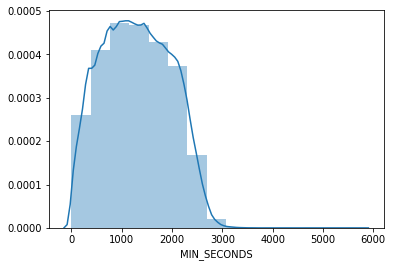

In [20]:
# Após a substituição dos mesmos, podemos ver que agora os dados estão normalizados
sns.distplot(df_gd['MIN_SECONDS'], bins=15)

In [21]:
# A partir daqui conseguimos aplicar uma regra de 3 para apresentar a média 
# de pontos, assistências e rebotes, levando como base os minutos em quadra e a temporada
# (PTS.mean() * MIN_SECONDS) / MIN_SECONDS.mean()
# (REB.mean() * MIN_SECONDS) / MIN_SECONDS.mean()
# (AST.mean() * MIN_SECONDS) / MIN_SECONDS.mean()

stats = df_gd.groupby(['PLAYER_ID', 'SEASON'])

df_gd['PTS'] = df_gd['PTS'].fillna(
    ( (stats['PTS'].transform('mean') *  df_gd['MIN_SECONDS']) / stats['MIN_SECONDS'].transform('mean') )
)

df_gd['REB'] = df_gd['REB'].fillna(
    ( (stats['REB'].transform('mean') *  df_gd['MIN_SECONDS']) / stats['MIN_SECONDS'].transform('mean') )
)

df_gd['AST'] = df_gd['AST'].fillna(
    ( (stats['AST'].transform('mean') *  df_gd['MIN_SECONDS']) / stats['MIN_SECONDS'].transform('mean') )
)

In [22]:
#ainda existem valores nulos na pontuação, logo preenchemos com o valor da carreira
df_gd['PTS'] = df_gd['PTS'].fillna(df_gd.groupby(['PLAYER_ID'])['PTS'].transform('mean'))
df_gd['REB'] = df_gd['REB'].fillna(df_gd.groupby(['PLAYER_ID'])['REB'].transform('mean'))
df_gd['AST'] = df_gd['AST'].fillna(df_gd.groupby(['PLAYER_ID'])['AST'].transform('mean'))

In [23]:
df_gd['PTS'].fillna(0, inplace=True)
df_gd['REB'].fillna(0, inplace=True)
df_gd['AST'].fillna(0, inplace=True)

In [44]:
filter_stats = (df_gd['SEASON'].isin([2017,2018,2019]))
new_df = df_gd[filter_stats].groupby(['PLAYER_NAME', 'SEASON']).agg({
    'PTS': 'mean',
    'REB': 'mean',
    'AST': 'mean',
    'MIN_SECONDS': 'mean'
})


new_df['MIN_SECONDS'] = new_df['MIN_SECONDS'] / 60

In [46]:
new_df.reset_index(inplace=True)

In [47]:
new_df

,index,PLAYER_NAME,SEASON,PTS,REB,AST,MIN_SECONDS
0,0,AJ Hammons,2017,2.827586,2.068966,0.241379,8.476437
1,1,Aaron Brooks,2017,2.305556,0.472222,0.694444,5.924537
2,2,Aaron Gordon,2017,17.682540,7.841270,2.206349,32.203439
3,3,Aaron Gordon,2018,15.666667,7.344828,3.643678,33.446360
4,4,Aaron Gordon,2019,13.983333,7.300000,3.333333,31.649722
...,...,...,...,...,...,...,...
1874,1874,Zhaire Smith,2019,3.181818,0.909091,0.272727,6.618182
1875,1875,Zhou Qi,2017,1.200000,1.120000,0.080000,5.812667
1876,1876,Zhou Qi,2018,2.000000,0.000000,0.000000,0.950000
1877,1877,Zion Williamson,2019,23.947368,6.736842,2.157895,28.522807


In [48]:
new_df[['PLAYER_NAME', 'SEASON', 'PTS', 'REB', 'AST']].to_csv('nba-stats.csv', index=False)

In [26]:
new_df[new_df['PLAYER_NAME'] == 'LaMarcus Aldridge']

,PLAYER_NAME,SEASON,PTS,REB,AST,MIN_SECONDS
1146,LaMarcus Aldridge,2017,22.835294,8.305882,2.094118,33.144706
1147,LaMarcus Aldridge,2018,20.804348,9.130435,2.380435,32.882065
1148,LaMarcus Aldridge,2019,18.357143,7.392857,2.392857,32.240476


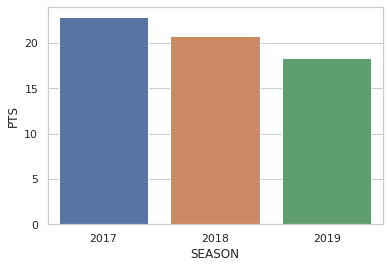

In [27]:
sns.set(style="whitegrid")
ax = sns.barplot(x="SEASON", y="PTS", data=new_df[new_df['PLAYER_NAME'] == 'LaMarcus Aldridge'])

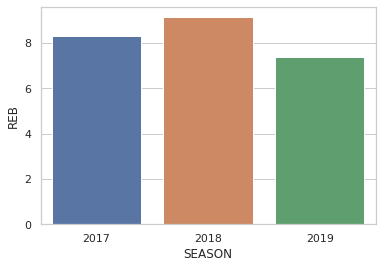

In [28]:
sns.set(style="whitegrid")
ax = sns.barplot(x="SEASON", y="REB", data=new_df[new_df['PLAYER_NAME'] == 'LaMarcus Aldridge'])

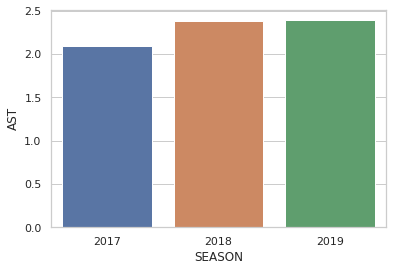

In [29]:
sns.set(style="whitegrid")
ax = sns.barplot(x="SEASON", y="AST", data=new_df[new_df['PLAYER_NAME'] == 'LaMarcus Aldridge'])